In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, os

In [2]:
plt.style.use('tableau-colorblind10')

In [3]:
projdir = os.getcwd()
datdir = projdir + "/data/lslr/projections_csv"
plotdir = projdir + "/figures"

In [4]:
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
print("Will save plots to ",plotdir)

Will save plots to  /Users/aewsma/codes/tempthresholds/figures


In [5]:
rcp_scenarios = ["RCP26","RCP45","RCP60","RCP85"]
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

In [46]:
dfT = {scen : None for scen in scenarios} # temperatures
dfS = {scen : None for scen in scenarios} # GMSL

for rcp in rcp_scenarios:
    scendir = datdir + "/"+str(rcp)
    dfT[rcp] = pd.read_csv(scendir+"/projections_temperature_"+str(rcp)+"_sneasybrick.csv")
    dfS[rcp] = pd.read_csv(scendir+"/projections_gmsl_"+str(rcp)+"_sneasybrick.csv")

years = pd.read_csv(scendir+"/projections_MAP_"+str(rcp)+"_sneasybrick.csv",usecols=["YEAR"])

normalize relative to 1995-2014 mean (sea levels) and 1850-1900 mean (temperatures)

In [75]:
for rcp in rcp_scenarios:
    dfT[rcp] = dfT[rcp] - dfT[rcp].loc[(years.YEAR>=1850) & (years.YEAR<=1900)].mean(axis=0)
    dfS[rcp] = dfS[rcp] - dfS[rcp].loc[(years.YEAR>=1995) & (years.YEAR<=2014)].mean(axis=0)

Get quantiles for plotted shaded regions

In [76]:
quantiles = np.array([0.025,0.05,0.17,0.25,0.50,0.75,0.83,0.95,0.975])
qT = {rcp : dfT[rcp].quantile(quantiles, axis=1) for rcp in rcp_scenarios}
qS = {rcp : dfS[rcp].quantile(quantiles, axis=1) for rcp in rcp_scenarios}

In [49]:
rcp_shading = {"RCP26" : ( 67/255, 147/255, 195/255),
               "RCP45" : (146/255, 197/255, 222/255),
               "RCP60" : (204/255, 174/255, 113/255),
               "RCP85" : (252/255, 209/255, 197/255)}
rcp_lines = {"RCP26" : (  0/255,  52/255, 102/255),
             "RCP45" : (112/255, 160/255, 205/255),
             "RCP60" : (196/255, 121/255,   0/255),
             "RCP85" : (153/255,   0/255,   2/255)}

Comparison to IPCC AR6

Ch 9, Table 9.8, year 2100:

    RCP2.6:
        MICI: 0.41 (0.35–0.48) m
        SEJ: 0.53 (0.38–0.79) m
    RCP8.5:
        MICI: 0.99 (0.82–1.19) m
        SEJ: 1.00 (0.70–1.60) m

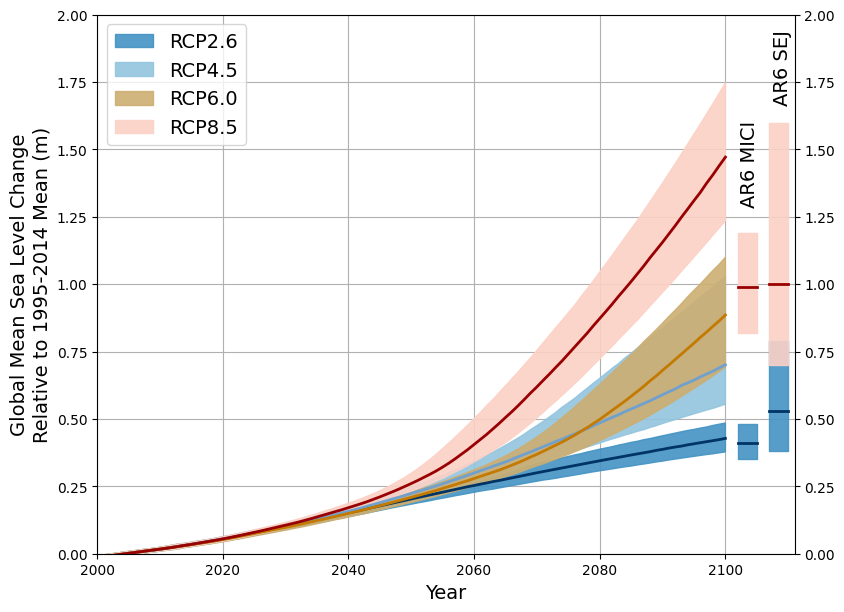

In [66]:
fig,ax = plt.subplots(1,1,figsize=(9,7))
for rcp in rcp_scenarios:
    ax.fill_between(years.YEAR[:251], np.array(qS[rcp].iloc[np.where(quantiles==0.17)])[0][:251], 
                    np.array(qS[rcp].iloc[np.where(quantiles==0.83)])[0][:251], alpha=0.9, color=rcp_shading[rcp], label=rcp[:4]+"."+rcp[-1])
    ax.plot(years.YEAR[:251],np.array(qS[rcp].iloc[np.where(quantiles==0.5)])[0][:251], linewidth=2, color=rcp_lines[rcp])
ax.set_xlim([2000,2111]); ax.set_ylim([0,2]);
ax.fill_between([2102,2105], [0.35]*2, [0.48]*2, alpha=0.9, color=rcp_shading["RCP26"])
ax.fill_between([2107,2110], [0.38]*2, [0.79]*2, alpha=0.9, color=rcp_shading["RCP26"])
ax.plot([2102,2105],[0.41]*2, linewidth=2, color=rcp_lines["RCP26"])
ax.plot([2107,2110],[0.53]*2, linewidth=2, color=rcp_lines["RCP26"])
ax.fill_between([2102,2105], [0.82]*2, [1.19]*2, alpha=0.9, color=rcp_shading["RCP85"])
ax.fill_between([2107,2110], [0.70]*2, [1.60]*2, alpha=0.9, color=rcp_shading["RCP85"])
ax.plot([2102,2105],[0.99]*2, linewidth=2, color=rcp_lines["RCP85"])
ax.plot([2107,2110],[1.00]*2, linewidth=2, color=rcp_lines["RCP85"])
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Sea Level Change\nRelative to 1995-2014 Mean (m)",fontsize=14);
plt.legend(loc="upper left", fontsize=14);
plt.tick_params(right=True, labelright=True)
plt.text(2102.4,1.3,"AR6 MICI",fontsize=14,rotation=90)
plt.text(2107.5,1.68,"AR6 SEJ",fontsize=14,rotation=90)
plt.grid(); ax.set_axisbelow(True)
fig.savefig("./figures/gmsl_projections_2100.pdf", bbox_inches='tight');

Ch 9, Table 9.8, year 2150:

    RCP2.6:
        MICI: 0.74 (0.62–0.91) m
        SEJ: 0.84 (0.56–1.34) m
    RCP8.5:
        MICI: 3.48 (2.57–4.82) m
        SEJ: 1.79 (1.22–2.94) m

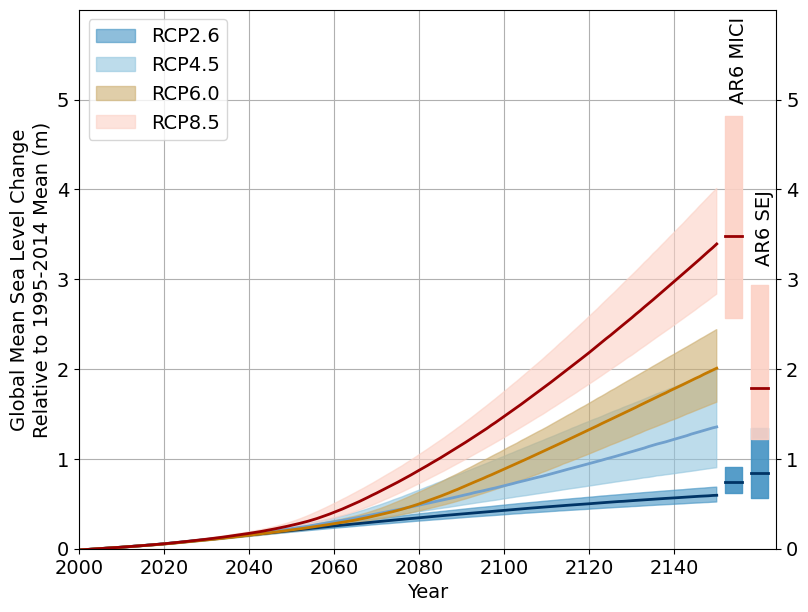

In [67]:
fig,ax = plt.subplots(1,1,figsize=(9,7))
for rcp in rcp_scenarios:
    ax.fill_between(years.YEAR[:301], np.array(qS[rcp].iloc[np.where(quantiles==0.17)])[0][:301], 
                    np.array(qS[rcp].iloc[np.where(quantiles==0.83)])[0][:301], alpha=0.6, color=rcp_shading[rcp], label=rcp[:4]+"."+rcp[-1])
    ax.plot(years.YEAR[:301],np.array(qS[rcp].iloc[np.where(quantiles==0.5)])[0][:301], linewidth=2, color=rcp_lines[rcp])
ax.set_xlim([2000,2164]); ax.set_ylim([0,6]);
ax.set_xticks(list(range(2000,2150,20)))
ax.set_xticklabels(list(range(2000,2150,20)),fontsize=14)
ax.set_yticks(list(range(6))); ax.set_yticklabels(list(range(6)), fontsize=14)
ax.fill_between([2152,2156], [0.62]*2, [0.91]*2, alpha=0.9, color=rcp_shading["RCP26"])
ax.fill_between([2158,2162], [0.56]*2, [1.34]*2, alpha=0.9, color=rcp_shading["RCP26"])
ax.plot([2152,2156],[0.74]*2, linewidth=2, color=rcp_lines["RCP26"])
ax.plot([2158,2162],[0.84]*2, linewidth=2, color=rcp_lines["RCP26"])
ax.fill_between([2152,2156], [2.57]*2, [4.82]*2, alpha=0.9, color=rcp_shading["RCP85"])
ax.fill_between([2158,2162], [1.22]*2, [2.94]*2, alpha=0.9, color=rcp_shading["RCP85"])
ax.plot([2152,2156],[3.48]*2, linewidth=2, color=rcp_lines["RCP85"])
ax.plot([2158,2162],[1.79]*2, linewidth=2, color=rcp_lines["RCP85"])
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Sea Level Change\nRelative to 1995-2014 Mean (m)",fontsize=14);
plt.legend(loc="upper left", fontsize=14);
plt.tick_params(right=True, labelright=True)
plt.text(2153,5,"AR6 MICI",fontsize=14,rotation=90)
plt.text(2159,3.2,"AR6 SEJ",fontsize=14,rotation=90)
plt.grid(); ax.set_axisbelow(True)
fig.savefig("./figures/gmsl_projections_2150.pdf", bbox_inches='tight');

temperatures

From [AR6 Summary for Policymakers](https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_SPM.pdf) (B.1.1):

"The assessed climate response to GHG emissions scenarios results in a best estimate of warming for 2081–2100 that spans a range
from 1.4°C for a very low GHG emissions scenario (SSP1-1.9) to 2.7°C for an intermediate GHG emissions scenario
(SSP2-4.5) and 4.4°C for a very high GHG emissions scenario (SSP5-8.5)30, with narrower uncertainty ranges31 than for
corresponding scenarios in AR5. {Cross-Section Boxes 1 and 2, 3.1.1, 3.3.4, Table 3.1, 4.3} (Box SPM.1)"

"The best estimates [and very likely ranges] for the different scenarios are: 1.4 [1.0 to 1.8 ]°C (SSP1-1.9); 1.8 [1.3 to 2.4]°C (SSP1-2.6); 2.7 [2.1 to 3.5]°C (SSP2-4.5); 3.6 [2.8 to 4.6]°C (SSP3-7.0); and 4.4 [3.3 to 5.7 ]°C (SSP5-8.5). {3.1.1} (Box SPM.1)"

And Table SPM1 [here](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_SPM.pdf)

(Temperatures are relative to IPCC "pre-industrial" period of 1850-1900)

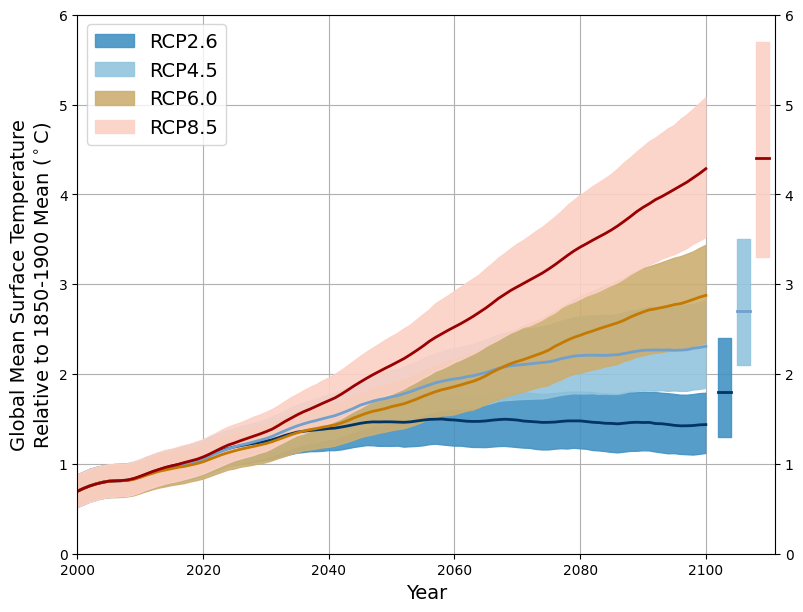

In [91]:
fig,ax = plt.subplots(1,1,figsize=(9,7))
for rcp in rcp_scenarios:
    ax.fill_between(years.YEAR[:251], np.array(qT[rcp].iloc[np.where(quantiles==0.05)])[0][:251], 
                    np.array(qT[rcp].iloc[np.where(quantiles==0.95)])[0][:251], alpha=0.9, color=rcp_shading[rcp], label=rcp[:4]+"."+rcp[-1])
    ax.plot(years.YEAR[:251],np.array(qT[rcp].iloc[np.where(quantiles==0.5)])[0][:251], linewidth=2, color=rcp_lines[rcp])
ax.set_xlim([2000,2111]); ax.set_ylim([0,6]);
ax.fill_between([2102,2104], [1.3]*2, [2.4]*2, alpha=0.9, color=rcp_shading["RCP26"])
ax.plot([2102,2104],[1.8]*2, linewidth=2, color=rcp_lines["RCP26"])
ax.fill_between([2105,2107], [2.1]*2, [3.5]*2, alpha=0.9, color=rcp_shading["RCP45"])
ax.plot([2105,2107],[2.7]*2, linewidth=2, color=rcp_lines["RCP45"])
ax.fill_between([2108,2110], [3.3]*2, [5.7]*2, alpha=0.9, color=rcp_shading["RCP85"])
ax.plot([2108,2110],[4.4]*2, linewidth=2, color=rcp_lines["RCP85"])
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Surface Temperature\nRelative to 1850-1900 Mean ($^\circ$C)",fontsize=14);
plt.legend(loc="upper left", fontsize=14);
plt.tick_params(right=True, labelright=True)
#plt.text(2102.4,1.3,"AR6 MICI",fontsize=14,rotation=90)
#plt.text(2107.5,1.68,"AR6 SEJ",fontsize=14,rotation=90)
plt.grid(); ax.set_axisbelow(True)
fig.savefig("./figures/temp_projections_2100.pdf", bbox_inches='tight');

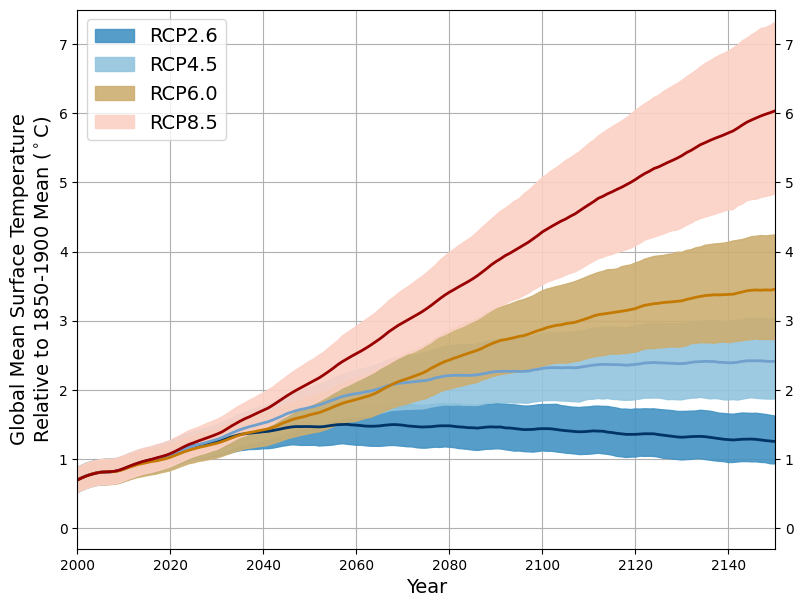

In [92]:
fig,ax = plt.subplots(1,1,figsize=(9,7))
for rcp in rcp_scenarios:
    ax.fill_between(years.YEAR[:301], np.array(qT[rcp].iloc[np.where(quantiles==0.05)])[0][:301], 
                    np.array(qT[rcp].iloc[np.where(quantiles==0.95)])[0][:301], alpha=0.9, color=rcp_shading[rcp], label=rcp[:4]+"."+rcp[-1])
    ax.plot(years.YEAR[:301],np.array(qT[rcp].iloc[np.where(quantiles==0.5)])[0][:301], linewidth=2, color=rcp_lines[rcp])
ax.set_xlim([2000,2150]); ax.set_ylim([-0.3,7.5]);
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Surface Temperature\nRelative to 1850-1900 Mean ($^\circ$C)",fontsize=14);
plt.legend(loc="upper left", fontsize=14);
plt.tick_params(right=True, labelright=True)
plt.grid(); ax.set_axisbelow(True)
fig.savefig("./figures/temp_projections_2150.pdf", bbox_inches='tight');